[ 7.07106781e-01+0.00000000e+00j  6.48354176e-01-2.63677968e-16j
  4.99797667e-01-3.88578059e-16j  3.23914509e-01-8.32667268e-17j
  1.76488110e-01-3.05311332e-16j  8.08281770e-02-8.32667268e-17j
  3.10155466e-02-1.11022302e-16j  9.45340225e-03-1.24249569e-16j
 -4.77434265e-31+1.77165962e-16j  9.45340225e-03+1.24249569e-16j
  3.10155466e-02+1.11022302e-16j  8.08281770e-02+8.32667268e-17j
  1.76488110e-01+3.05311332e-16j  3.23914509e-01+8.32667268e-17j
  4.99797667e-01+3.88578059e-16j  6.48354176e-01+2.63677968e-16j]


/home/vibin/anaconda3/envs/dp2/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


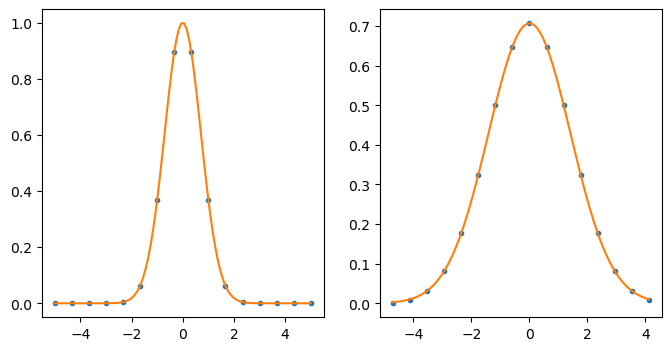

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.exp(-x*x)
def f_(k):
    return (1/np.sqrt(2)) * np.exp(-k*k/4)


x_min = -5
x_max = 5

n_points = 16
dx = (x_max - x_min)/(n_points-1)

x_arr = np.linspace(x_min, x_max, n_points)
sample_points = f(x_arr)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
ax1.plot(x_arr, sample_points, '.')

k_arr = 2 * np.pi * np.fft.fftfreq(n_points, d=dx)
ft_arr = np.fft.fft(sample_points, norm='ortho')
factor = dx * np.sqrt(n_points/ (2 * np.pi)) * np.exp(-1j * k_arr * x_min)
nft_arr = ft_arr * factor
print(ft_arr * factor)

ax2.plot(k_arr, nft_arr, '.')

k_min, k_max = np.min(k_arr), np.max(k_arr)

ax1.plot(np.linspace(x_min,x_max, 100), f(np.linspace(x_min,x_max, 100)))
ax2.plot(np.linspace(k_min,k_max, 100), f_(np.linspace(k_min,k_max, 100)))

/home/vibin/anaconda3/envs/dp2/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


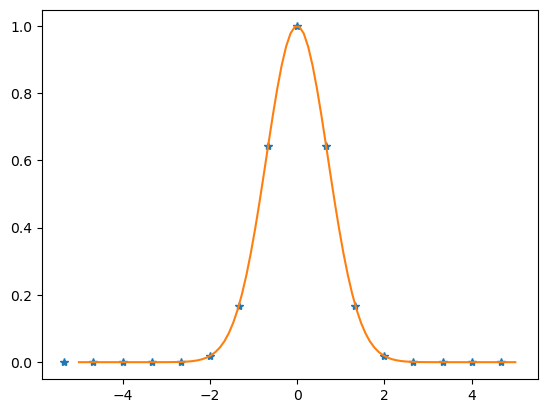

In [36]:
nft_arr_mod = nft_arr  #* np.exp(1j * k_arr * x_min)
inv_arr = np.fft.ifft(nft_arr_mod, norm='ortho')
del_k = np.diff(k_arr)[0]
new_x_arr = np.fft.fftfreq(n_points, d=(del_k/(2 * np.pi)))
factor = del_k * np.sqrt(n_points/ (2 * np.pi))
inv_arr = factor * inv_arr

plt.plot(new_x_arr, inv_arr, '*')
plt.plot(np.linspace(x_min,x_max, 100), f(np.linspace(x_min,x_max, 100)))

In [34]:
nft_arr  * np.exp(1j * k_arr * x_min)

array([ 7.07106781e-01+0.j        , -6.35896232e-01-0.12648762j,
        4.61752835e-01+0.19126429j, -2.69325072e-01-0.17995726j,
        1.24795939e-01+0.12479594j, -4.49057291e-02-0.06720617j,
        1.18691358e-02+0.02865463j, -1.84426729e-03-0.00927176j,
        1.77165962e-16+0.j        , -1.84426729e-03+0.00927176j,
        1.18691358e-02-0.02865463j, -4.49057291e-02+0.06720617j,
        1.24795939e-01-0.12479594j, -2.69325072e-01+0.17995726j,
        4.61752835e-01-0.19126429j, -6.35896232e-01+0.12648762j])

In [35]:
nft_arr

array([ 7.07106781e-01+0.00000000e+00j,  6.48354176e-01-2.63677968e-16j,
        4.99797667e-01-3.88578059e-16j,  3.23914509e-01-8.32667268e-17j,
        1.76488110e-01-3.05311332e-16j,  8.08281770e-02-8.32667268e-17j,
        3.10155466e-02-1.11022302e-16j,  9.45340225e-03-1.24249569e-16j,
       -4.77434265e-31+1.77165962e-16j,  9.45340225e-03+1.24249569e-16j,
        3.10155466e-02+1.11022302e-16j,  8.08281770e-02+8.32667268e-17j,
        1.76488110e-01+3.05311332e-16j,  3.23914509e-01+8.32667268e-17j,
        4.99797667e-01+3.88578059e-16j,  6.48354176e-01+2.63677968e-16j])